# Import Libraries

In [1]:
import pandas as pd
import panel as pn
pn.extension()
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process, fuzz
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

/Users/akhilsangaonkar/miniforge3/envs/dashboard/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Setting up pandas dataframe to show all the rows

In [2]:
# pd.set_option('display.max_rows', None)  # or 1000

# Searching for the correct csv file in the folder

In [3]:
#ls

# Dataframe

In [4]:
df = pd.read_csv('Latest_Data_Science_Salaries.csv')

In [5]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


# Check For Missing Values

In [6]:
df.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [7]:
unique_job = df['Job Title'].unique().tolist()

In [8]:
unique_job

['Data Engineer',
 'Data Scientist',
 'Analytics Engineer',
 'Business Intelligence Developer',
 'Machine Learning Engineer',
 'Data Analyst',
 'Decision Scientist',
 'Machine Learning Software Engineer',
 'BI Developer',
 'Machine Learning Scientist',
 'BI Analyst',
 'Data Manager',
 'Business Intelligence Engineer',
 'ML Engineer',
 'Data Science Manager',
 'AI Programmer',
 'Applied Scientist',
 'Data Analytics Manager',
 'Research Engineer',
 'Research Scientist',
 'Data Lead',
 'Data Strategist',
 'Data Quality Analyst',
 'Data Architect',
 'AI Architect',
 'Computer Vision Engineer',
 'Business Intelligence Analyst',
 'Principal Data Scientist',
 'Staff Machine Learning Engineer',
 'Staff Data Scientist',
 'Consultant Data Engineer',
 'Machine Learning Specialist',
 'Head of Data',
 'Data Quality Engineer',
 'Research Analyst',
 'Principal Machine Learning Engineer',
 'Deep Learning Engineer',
 'Data Visualization Specialist',
 'MLOps Engineer',
 'Business Intelligence Data Analy

In [9]:
original_title=[]
matching_title=[]
score=[]

for name in unique_job:
    match = process.extract(name, unique_job,scorer=fuzz.token_sort_ratio)
    for pair in match:
        original_title.append(name)
        matching_title.append(pair[0])
        score.append(pair[1])

# Maching Titles that are similar to each other for example data engineer and data engineer 2 are very similar

In [10]:
match_title = pd.DataFrame(list(zip(original_title,matching_title,score)),columns=['original_title','matching_title','score'])
match_title

,original_title,matching_title,score
0,Data Engineer,Data Engineer,100
1,Data Engineer,Data Engineer 2,93
2,Data Engineer,BI Data Engineer,90
3,Data Engineer,Big Data Engineer,87
4,Data Engineer,Lead Data Engineer,84
...,...,...,...
550,Principal Data Engineer,Principal Data Engineer,100
551,Principal Data Engineer,Data Science Engineer,77
552,Principal Data Engineer,Data Operations Engineer,77
553,Principal Data Engineer,Marketing Data Engineer,74


In [11]:
match_title[(match_title['score']!=100) ]

,original_title,matching_title,score
1,Data Engineer,Data Engineer 2,93
2,Data Engineer,BI Data Engineer,90
3,Data Engineer,Big Data Engineer,87
4,Data Engineer,Lead Data Engineer,84
6,Data Scientist,AI Scientist,85
...,...,...,...
549,Principal Data Analyst,Data Operations Analyst,76
551,Principal Data Engineer,Data Science Engineer,77
552,Principal Data Engineer,Data Operations Engineer,77
553,Principal Data Engineer,Marketing Data Engineer,74


# Map to replace various Job Profiles which are similar

In [12]:
map = {'Data Engineer 2':'Data Engineer' , 'Lead Data Engineer' : 'Data Engineer', 'Data Scientist Lead' : 'Data Scientist' ,
    'Lead Data Scientist': 'Data Scientist', 'Staff Data Scientist' : 'Data Scientist' , 'BI Developer': 'Business Intelligence Developer',
    'Lead Machine Learning Engineer' : 'Machine Learning Engineer' , 'Staff Machine Learning Engineer' : 'Machine Learning Engineer',
    'Applied Machine Learning Engineer' : 'Machine Learning Engineer' ,'Machine Learning Software Engineer' : 'Machine Learning Engineer',
    'BI Data Analyst' : 'Data Analyst' , 'Lead Data Analyst' : 'Data Analyst' , 'Staff Data Analyst' : 'Data Analyst' ,'Sales Data Analyst':
     'Data Analyst' , 'Decision Scientist' : 'Data Scientist',
 'Applied Data Scientist':'Data Scientist' ,'Machine Learning Research Engineer' : 'Researcher' ,
     'Principal Machine Learning Engineer' : 'Machine Learning Engineer' ,'Data Quality Analyst' :'Data Analyst' ,'Finance Data Analyst':
      'Data Analyst','Product Data Analyst':'Data Analyst' ,'Principal Data Engineer':'Data Engineer',
       'Principal Data Analyst':'Data Analyst',
      'Head of Machine Learning' : 'Machine Learning Engineer', 'Machine Learning Specialist' : 'Researcher' ,'Data Analytics Lead'
       : 'Data Analyst' ,'Data Strategist' : 'Data Scientist' ,
       'BI Data Engineer' : 'Data Engineer' , 'Big Data Engineer' : 'Data Engineer' , 'Cloud Data Engineer' : 'Data Engineer' ,
       'Azure Data Engineer' : 'Data Engineer' , 'Data DevOps Engineer' : 'Data Engineer' , 'Data Quality Engineer' : 'Data Engineer',
       'Software Data Engineer' : 'Data Engineer', 'Cloud Database Engineer' : 'Data Engineer' , 'Data Specialist' : 'Data Scientist' ,
       'Principal Data Scientist' : 'Data Scientist' , 'Business Intelligence Analyst' : 'Data Analyst' ,
       'Machine Learning Developer' : 'Machine Learning Engineer' , 'BI Analyst' : 'Data Analyst' ,
       'Cloud Data Architect' : 'Data Architect' ,	'Principal Data Architect' : 'Data Architect', 'Big Data Architect' : 'Data Architect',
       'AWS Data Architect' : 'Data Architect' , 'Marketing Data Analyst' : 'Data Analyst' , 'Data Science Tech Lead' : 'Data Scientist',
       'Data Science Lead' : 'Data Scientist' ,'Data Analytics Consultant' : 'Data Analyst' , 'Compliance Data Analyst' : 'Data Analyst' , 
      'Marketing Data Engineer' : 'Data Engineer' ,'Data Analytics Specialist' : 'Data Analyst' ,'Financial Data Analyst' : 'Data Analyst',
   'Data Operations Analyst' : 'Data Analyst' , 'Insight Analyst' : 'Data Analyst' , 'Applied Machine Learning Scientist' : 'Researcher' ,
  'Machine Learning Researcher' : 'Researcher' ,'AI Scientist' : 'Researcher' ,'Deep Learning Researcher' : 'Researcher' ,'ML Engineer' :
       'Machine Learning Engineer' ,'Research Scientist' : 'Researcher' ,'Research Engineer' : 'Researcher' ,'Machine Learning Scientist': 
       'Researcher', 'Applied Scientist' : 'Researcher' ,'MLOps Engineer' : 'Machine Learning Engineer','Research Analyst' : 'Researcher',
       'Business Intelligence Data Analyst' : 'Data Analyst' ,'Data Operations Engineer' : 'Data Engineer' ,'Business Data Analyst' :
       'Data Analyst' , 'Data Management Specialist' : 'Data Engineer' , 'Consultant Data Engineer' : 'Data Engineer'
       
      
      }

In [13]:
df['New title'] = df['Job Title'].map(map).fillna(df['Job Title'])

In [14]:
df['New title'].value_counts()

New title
Data Engineer                               748
Data Scientist                              708
Data Analyst                                561
Machine Learning Engineer                   397
Researcher                                  298
Analytics Engineer                          132
Data Architect                               89
Data Science Manager                         59
Data Manager                                 35
Data Science Consultant                      25
Business Intelligence Developer              24
Data Analytics Manager                       23
Computer Vision Engineer                     22
Business Intelligence Engineer               20
Director of Data Science                     19
Head of Data                                 15
NLP Engineer                                 13
Machine Learning Infrastructure Engineer     13
Head of Data Science                         11
AI Developer                                  9
Data Science Engineer         

# For My Analysis I will consider only the below mentioned positions

In [15]:
positions = [ 'Data Engineer' , 'Data Scientist' , 'Data Analyst' , 'Machine Learning Engineer' , 'Researcher' ]

In [16]:
df = df[df['New title'].isin(positions)]

In [17]:
df.shape

(2712, 12)

In [18]:
df.drop(['Job Title' , 'Salary Currency' , 'Salary'],inplace=True , axis=1)

In [19]:
df= df.rename(columns={'New title' : 'Job Title'})

In [20]:
col = ['Year' , 'Job Title' , 'Company Location' , 'Company Size' , 'Employment Type' , 'Experience Level' , 'Expertise Level'
       , 'Employee Residence' , 'Salary in USD' ]
df = df[col]

In [21]:
df

,Year,Job Title,Company Location,Company Size,Employment Type,Experience Level,Expertise Level,Employee Residence,Salary in USD
0,2023,Data Engineer,United States,Medium,Full-Time,Senior,Expert,United States,210000
1,2023,Data Engineer,United States,Medium,Full-Time,Senior,Expert,United States,165000
2,2023,Data Engineer,United States,Medium,Full-Time,Senior,Expert,United States,185900
3,2023,Data Engineer,United States,Medium,Full-Time,Senior,Expert,United States,129300
4,2023,Data Scientist,United States,Medium,Full-Time,Senior,Expert,United States,140000
...,...,...,...,...,...,...,...,...,...
3294,2021,Data Scientist,United States,Large,Full-Time,Senior,Expert,United States,165000
3295,2020,Data Scientist,United States,Large,Full-Time,Senior,Expert,United States,412000
3296,2021,Data Scientist,United States,Large,Full-Time,Mid,Intermediate,United States,151000
3297,2020,Data Scientist,United States,Small,Full-Time,Entry,Junior,United States,105000


In [22]:
idf = df.interactive()

In [23]:
year_slider = pn.widgets.IntInput(name='', start=2020, end=2023, step=1)
year_slider

IntInput(end=2023, start=2020, value=2020)

In [24]:
pipe = idf[idf['Year'] <= year_slider].groupby('Year')['Job Title'].count().to_frame(). \
rename(columns={'Job Title' : 'Total Jobs'}).sort_values('Year')

# Creating Interactive table which changes based on year selector

In [25]:
table = pipe.hvplot.table(columns=['Year' ,'Total Jobs'])
table

# Bar Graph 

In [26]:
pipe1=idf[idf['Year'] == year_slider].groupby(['Year','Job Title'])['Company Size'].count().reset_index()\
.rename(columns ={'Company Size' : 'Total Jobs'})
pipe1

In [27]:
palette=['#003f5c','#58508d' ,'#bc5090','#ff6361','#ffa600']
color_map={'Data Analyst':'#1f4658','Data Engineer':'#327084' ,'Data Scientist':'#489daf','Machine Learning Engineer':'#62cdd9',
     'Researcher':'#82ffff'}

In [28]:
bar = pipe1.hvplot.bar(x='Job Title',y='Total Jobs',color='Job Title',cmap=color_map,height=500,legend=False,rot=10,hover=False
                      ).opts(active_tools=[],title='Number of Jobs ')
bar

In [29]:
salary =idf[idf['Year']==year_slider].sort_values('Job Title')

# Box Plot

In [30]:
box=salary.hvplot.box(y='Salary in USD',by='Job Title',c='Job Title',cmap=color_map,legend=False,rot=10,hover=False).opts(active_tools=[]
                   , title='Distribution of Salary Across Various Fields')

In [31]:
box

In [32]:
pipe2=salary.sort_values('Expertise Level',ascending=False)

# Max and Min Salary in USD based on Employment type

In [33]:
table2=idf.groupby(['Employment Type'])['Salary in USD'].agg({'min','max'}).reset_index()
table2

# KDE distribution plot which changes based on year selector

In [34]:
c=['#c9c9c9','#96a4b7','#6180a5','#155f93']

sal_dist=pipe2.hvplot.kde(by='Experience Level',y='Salary in USD',color=c,legend='bottom_right',xlim=[0,1000000],hover=False
                         ).opts(active_tools=[], title='Distribution of Salary Based on Experience Level')
sal_dist

# Violin plot interactive based on changes in expertise level and not on year selector

In [35]:
color_dict = {'Small': '#35ffff', 'Medium': '#00afe4', 'Large': '#255ea4'}
violin=df.sort_values('Company Size',ascending=False).hvplot.violin(y='Salary in USD', by='Company Size', groupby='Expertise Level'
                              ,height=300 ,width=600     ,c='Company Size',cmap= color_dict,legend=False).opts(active_tools=[]
                                     , title='Distribution of Salary Based on Expertise Level and Company Size')
violin

:DynamicMap   [Expertise Level]
   :Violin   [Company Size]   (Salary in USD)

In [36]:
@pn.depends(year_slider.param.value)
def main_title(year):
   return '# BAR GRAPH , BOX PLOT AND KDE PLOT ARE INDICATED FOR THE YEAR : {start}'.format(start=year)

# Final Interactive Dashboard template

In [38]:
template = pn.template.FastListTemplate(theme='dark',theme_toggle=False,busy_indicator=None,
    title='Data Science Job Analysis by Akhil Sangaonkar', 
    sidebar=[pn.pane.Markdown("# DataPay: Unraveling Data Science Salaries"), 
             pn.pane.Markdown("#### Welcome to my Data Science Salaries Dashboard! Explore salaries for Data Analysts, Data Engineers, Machine Learning Engineers, Data Scientists, and Researchers. Navigate dynamic graphs for valuable insights. The data is available for years 2020 to 2023."), 
             pn.pane.PNG('wc.png', sizing_mode='scale_both'),
            pn.pane.Markdown("## Year Selector"),   
             year_slider,pn.pane.Markdown("#### Maximum and Minimum Salary Based on Employement Type"),
             table2.panel(width=300,height=500),table.panel(width=300,height=500)],
    main=[pn.Row(main_title,height=94),pn.Row(bar.panel(width=500,height=400), 
                          box.panel(width=500,height=400) ),
         pn.Row(sal_dist.panel(width=1000,height=300)),
         pn.Row(violin)],
         
    accent_base_color="#303030",
    header_background="#000000"
)
#template.show()
#template.servable()

# This is how the dashboard finally looks and it is interactive based on what you select in year selector

## Note : The wordcloud has been created in different jupyter notebook based on the same data before selecting specific positions for analysis

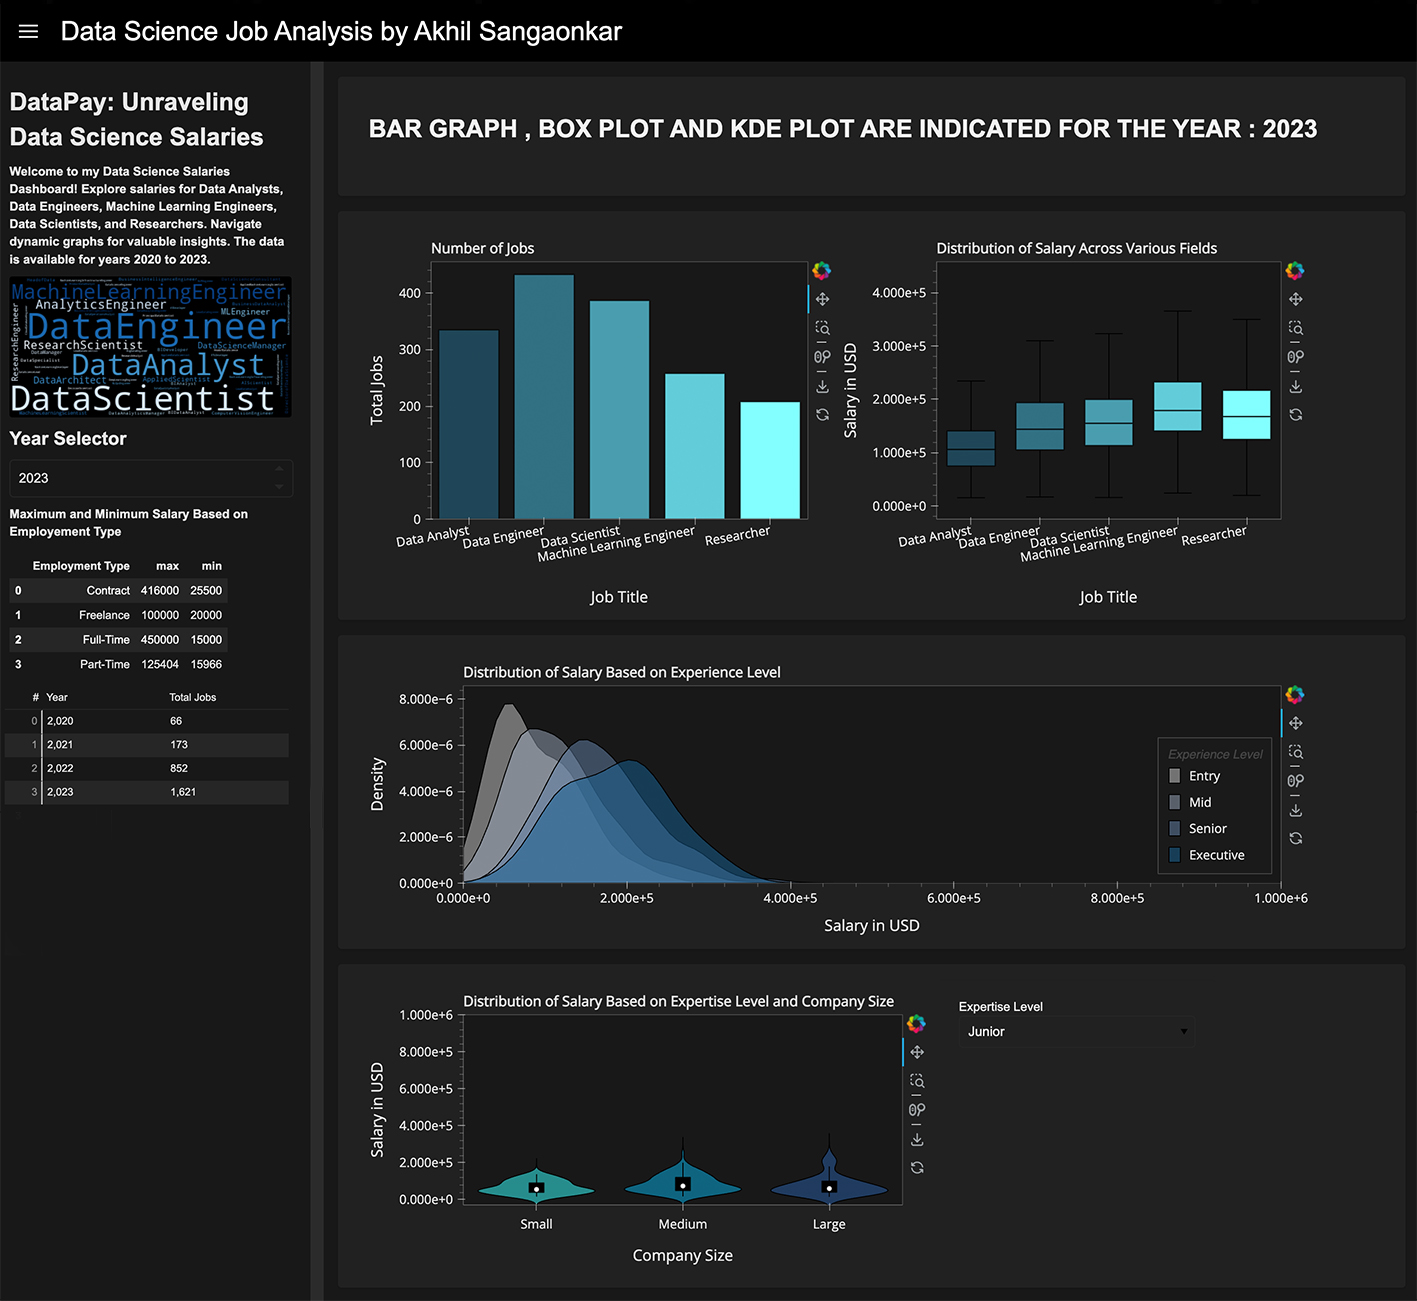